In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
hist = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8255 - accuracy: 0.7387 - val_loss: 0.6560 - val_accuracy: 0.7794
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5919 - accuracy: 0.8075 - val_loss: 0.5822 - val_accuracy: 0.8056
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5424 - accuracy: 0.8221 - val_loss: 0.5511 - val_accuracy: 0.8133
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5155 - accuracy: 0.8282 - val_loss: 0.5311 - val_accuracy: 0.8209
Epoch 5/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4979 - accuracy: 0.8336 - val_loss: 0.5199 - val_accuracy: 0.8243
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4856 - accuracy: 0.8372 - val_loss: 0.5077 - val_accuracy: 0.8263
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4757 - accuracy: 0.8402 - val_loss: 0.5008 - val_accuracy:

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\ntest accuracy:', test_acc)

313/313 - 0s - loss: 0.4550 - accuracy: 0.8420

test accuracy: 0.8420000076293945


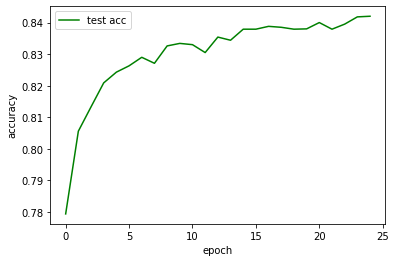

In [9]:
fig, acc_ax = plt.subplots()
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='upper left')

plt.show()